# DATA EXPLORATION INTERBANK 2020

## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import mygraph,analyze
import numpy as np

## Datasets

- y train:
        y_train.csv
- Sample submission:
        sample_submission.csv
- Historial crediticio: 
        rcc_[train|test].csv 
- Información socio-económica:
        se_[train|test].csv 
- Información fiscal:
        sunat_[train|test].csv
- Información censal:
        censo_[train|test].csv
- Productos:
        productos.csv


## Y train analysis

In [3]:
y_train = pd.read_csv('../resources/data/y_train.csv')
y_train = analyze.reduce_mem_usage(y_train)

# Check uniques keys in table
print("rows in table :",y_train.shape[0])
print("key values    :",y_train.key_value.nunique())
y_train.head(2)

Memory usage of dataframe is 5.47 MB
Memory usage after optimization is: 1.71 MB
Decreased by 68.7%
rows in table : 358487
key values    : 358487


,key_value,target
0,0,0
1,1,0


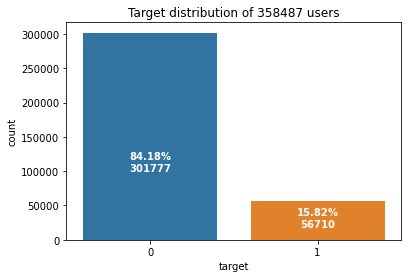

In [4]:
# Now lets check the target distributions
mygraph.graph_target(y_train,"target",save=True)

## Sample submission

In [5]:
sample_submission = pd.read_csv('../resources/data/sample_submission.csv')
sample_submission = analyze.reduce_mem_usage(sample_submission)
# Check uniques keys in table
print("rows in table :",sample_submission.shape[0])
print("key values    :",sample_submission.key_value.nunique())
y_train.head(2)

Memory usage of dataframe is 6.05 MB
Memory usage after optimization is: 1.89 MB
Decreased by 68.7%
rows in table : 396666
key values    : 396666


,key_value,target
0,0,0
1,1,0


In [6]:
# not apply in this challenge because the id in train and test have different meaning
intersection,different = analyze.intersection_columns(sample_submission.key_value,y_train.key_value,name1="submission",name2="y_train")

# key_value in submission     :  396666
# key_value in y_train        :  358487
# intersection                :  358487
# different                   :  38179
example intersection          :  [0, 1, 358485, 358486]
example different             :  [358487, 358488, 396664, 396665]


## Historial crediticio

In [7]:
rcc_train = pd.read_csv("../resources/data/rcc_train.csv")
rcc_train = analyze.reduce_mem_usage(rcc_train)
rcc_train.head(3)

Memory usage of dataframe is 2086.83 MB
Memory usage after optimization is: 521.71 MB
Decreased by 75.0%


,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
0,201711,4,0,12,33,-0.072571,6,-1,0
1,201711,4,0,12,33,-0.070618,7,-1,0
2,201711,4,0,12,61,-0.052063,5,-1,0


In [8]:
rcc_test = pd.read_csv("../resources/data/rcc_test.csv")
rcc_test = analyze.reduce_mem_usage(rcc_test)
rcc_test.head(3)

Memory usage of dataframe is 2358.75 MB
Memory usage after optimization is: 622.45 MB
Decreased by 73.6%


,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
0,201811,1103,0,10,28.0,-0.072815,1.0,-1,0
1,201811,1103,0,10,28.0,-0.072876,5.0,-1,0
2,201811,1103,0,10,28.0,-0.065857,4.0,1,0


### COD MES

In [9]:
# Get uniques values of datasets
#rcc_train[rcc_train.key_value == 4].sort_values(by=['codmes'])
unique_moths = rcc_train[rcc_train.key_value == 4]["codmes"].unique()
unique_moths.sort()
print(unique_moths)

unique_moths = rcc_test[rcc_test.key_value == 4]["codmes"].unique()
unique_moths.sort()
print(unique_moths)

[201707 201708 201709 201710 201711 201712 201801 201802]
[201803 201809 201810 201811 201812 201901 201902]


In [10]:
# Get uniques values of datasets
#rcc_train[rcc_train.key_value == 4].sort_values(by=['codmes'])
unique_moths = rcc_train[rcc_train.key_value == 1]["codmes"].unique()
unique_moths.sort()
print(unique_moths)

unique_moths = rcc_test[rcc_test.key_value == 1]["codmes"].unique()
unique_moths.sort()
print(unique_moths)

[201712 201801 201802]
[201803 201804 201805 201806 201807 201808 201809 201810 201811 201812
 201901 201902]


In [11]:
# faster analytic of periods of time 
ft={'codmes':['max','min','nunique','size']}
rcc_train_ag=rcc_train[['key_value','codmes']].groupby(['key_value']).agg(ft).reset_index()
rcc_train_ag.columns=[x[0]+'-codmes-'+x[1] if (x[0]!='key_value') else x[0] for x in rcc_train_ag.columns]
rcc_train_ag.head(3)

,key_value,codmes-codmes-max,codmes-codmes-min,codmes-codmes-nunique,codmes-codmes-size
0,0,201802,201703,12,53
1,1,201802,201712,3,8
2,2,201802,201703,2,6


In [12]:
#find if exist period more than 12 months
rcc_train_ag[rcc_train_ag["codmes-codmes-nunique"]>12]

,key_value,codmes-codmes-max,codmes-codmes-min,codmes-codmes-nunique,codmes-codmes-size


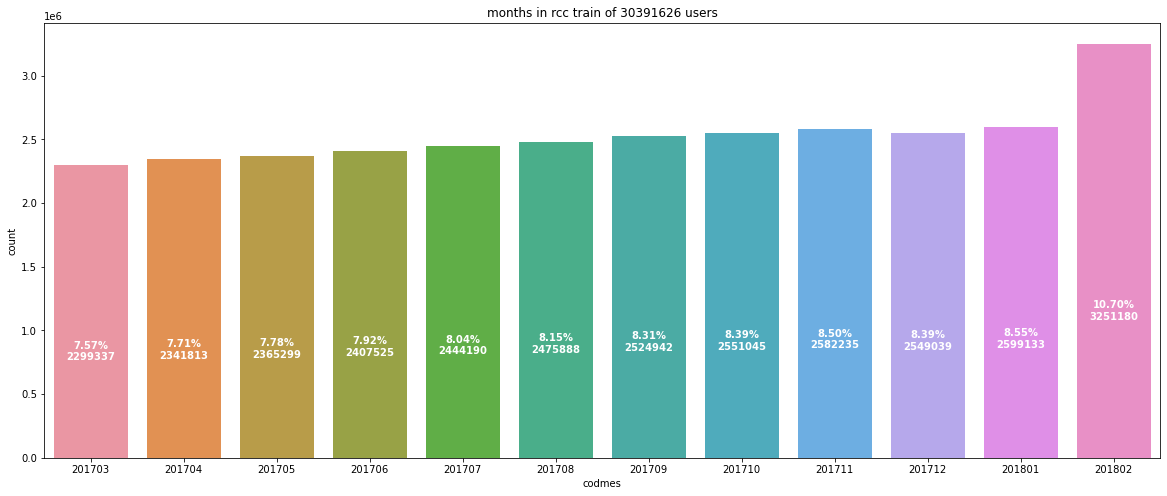

In [13]:
#graph train histogram of months
mygraph.graph_target(rcc_train,name="codmes",figsize=(20,8),title_name="months in rcc train",save=True,name_file='months_hist_train')

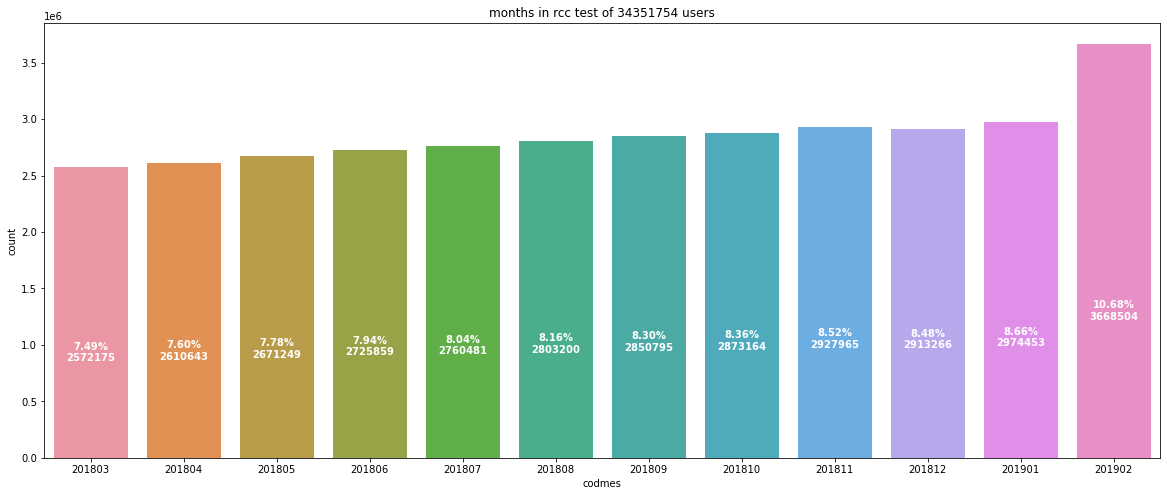

In [14]:
#graph test histogram of months
mygraph.graph_target(rcc_test,name="codmes",figsize=(20,8),title_name="months in rcc test",save=True,name_file='months_hist_test')

### Saldos

In [15]:
#evaluate user - historial crediticio
print(y_train[y_train.key_value == 358484])
aux = rcc_train[rcc_train.key_value == 358484].sort_values(by=['codmes'])
print(aux.shape)
aux.head(8)

        key_value  target
358484     358484       0
(4, 9)


,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
29943035,201802,358484,0,12,61,-0.072693,1,-1,0
29943036,201802,358484,0,12,61,-0.059357,5,-1,0
29943037,201802,358484,0,12,61,-0.068359,7,-1,0
29943038,201802,358484,0,12,61,-0.059357,0,1,0


In [16]:
#evaluate user - historial crediticio
print(y_train[y_train.key_value == 1])
aux = rcc_train[rcc_train.key_value == 1].sort_values(by=['codmes'])
print(aux.shape)
aux.head(8)

   key_value  target
1          1       0
(8, 9)


,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
17202008,201712,1,0,10,19,-0.072693,1,-1,0
17202009,201712,1,0,10,19,-0.061707,4,1,0
17682471,201801,1,0,10,19,-0.062500,4,1,0
17682472,201801,1,0,10,19,-0.072693,1,-1,0
645517,201802,1,0,10,19,-0.072754,1,-1,0
645518,201802,1,0,10,28,-0.072876,5,-1,0
645519,201802,1,0,10,19,-0.063354,4,1,0
645520,201802,1,0,10,28,-0.061615,4,1,0


In [17]:
#evaluate user - historial crediticio
print(y_train[y_train.key_value == 4])
aux = rcc_train[rcc_train.key_value == 4].sort_values(by=['codmes'])
print(aux.shape)
aux.head(8)

   key_value  target
4          4       1
(58, 9)


,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
367010,201707,4,0,12,61,-0.052063,5,-1,0
367009,201707,4,0,12,61,-0.052246,0,1,0
367008,201707,4,0,12,61,-0.068909,7,-1,0
1092888,201708,4,0,12,61,-0.054138,0,1,0
1092890,201708,4,0,12,61,-0.052063,5,-1,0
1092889,201708,4,0,12,61,-0.068909,7,-1,0
67435,201709,4,0,12,61,-0.068909,7,-1,0
67436,201709,4,0,12,61,-0.056000,0,1,0


In [18]:
#evaluate user - historial crediticio
print(y_train[y_train.key_value == 358289])
aux = rcc_train[rcc_train.key_value == 358289].sort_values(by=['codmes'])
print(aux.shape)
aux.head(8)

        key_value  target
358289     358289       1
(15, 9)


,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
29847757,201712,358289,0,99,57,-0.072876,255,-1,0
29847758,201712,358289,0,12,57,-0.072876,1,-1,0
29847759,201712,358289,0,12,57,-0.067322,0,1,0
29064286,201801,358289,0,11,32,-0.072815,1,-1,0
29064287,201801,358289,0,11,32,-0.058472,3,-1,0
29064288,201801,358289,0,11,32,-0.062683,8,1,0
29064289,201801,358289,0,11,32,-0.048248,2,-1,0
29064290,201801,358289,0,12,57,-0.072571,1,-1,0


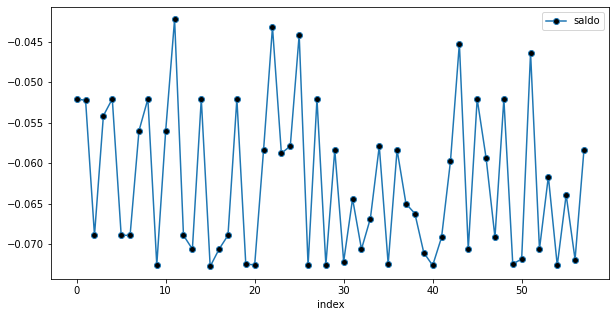

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,index,deuda
367010,201707,4,0,12,61,-0.052063,5,-1,0,0,-0.052063
367009,201707,4,0,12,61,-0.052246,0,1,0,1,-0.052246
367008,201707,4,0,12,61,-0.068909,7,-1,0,2,-0.068909


In [19]:
aux = rcc_train[rcc_train.key_value == 4].sort_values(by=['codmes'])
aux['index']= list(range(aux.shape[0]))
aux['deuda']=aux['saldo']

a = aux.plot(x="index",y=["saldo"],style='.-',marker='o', markerfacecolor='black',figsize=(10,5))
figure = a.get_figure()  
plt.show()

aux.head(3)

In [20]:
print(rcc_train.saldo.max())
aux = rcc_train[rcc_train.saldo == 1891.0].sort_values(by=['codmes'])
aux

1891.0


,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
20810499,201712,82764,0,9,28,1891.0,5,-1,0


In [21]:
y_train[y_train.key_value == 82764].head()

,key_value,target
82764,82764,0


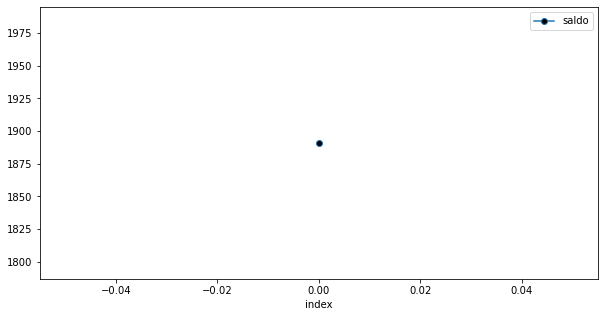

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,index,deuda
20810499,201712,82764,0,9,28,1891.0,5,-1,0,0,1891.0


In [22]:
y_trainx = rcc_train[rcc_train.key_value == 82764].sort_values(by=['codmes'])
aux['index']= list(range(aux.shape[0]))
aux['deuda']=aux['saldo']
a = aux.plot(x="index",y=["saldo"],style='.-',marker='o', markerfacecolor='black',figsize=(10,5))
figure = a.get_figure()  
plt.show()
aux.head(3)

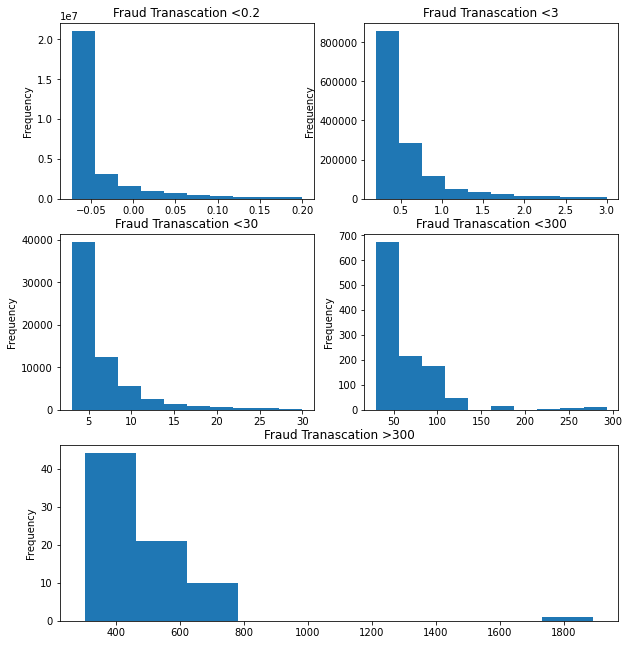

In [23]:
plt.figure(1,figsize=(10,11))
plt.subplot(3,2,1)
rcc_train[rcc_train.saldo<0.2].saldo.plot.hist(title="Fraud Tranascation <0.2")
plt.subplot(3,2,2)
rcc_train[(rcc_train.saldo>=0.2)&(rcc_train.saldo<3)].saldo.plot.hist(title="Fraud Tranascation <3")
plt.subplot(3,2,3)
rcc_train[(rcc_train.saldo>=3)&(rcc_train.saldo<30)].saldo.plot.hist(title="Fraud Tranascation <30")
plt.subplot(3,2,4)
rcc_train[(rcc_train.saldo>=30)&(rcc_train.saldo<300)].saldo.plot.hist(title="Fraud Tranascation <300")
plt.subplot(3,2,(5,6))
rcc_train[(rcc_train.saldo>=300)].saldo.plot.hist(title="Fraud Tranascation >300")
plt.show()

In [24]:
rcc_train["log_saldo"] = np.log((rcc_train.saldo>0)*rcc_train.saldo + (rcc_train.saldo<=0)*np.abs(rcc_train.saldo-0.0001))

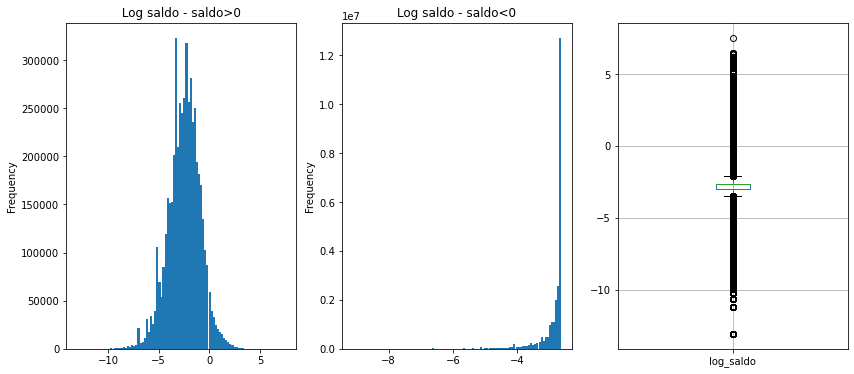

In [25]:
plt.figure(1,figsize=(14,6))
plt.subplot(1,3,1)
rcc_train.log_saldo[rcc_train.saldo>0].plot.hist(title=" Log saldo - saldo>0 ",bins=100)
plt.subplot(1,3,2)
rcc_train.log_saldo[rcc_train.saldo<=0].plot.hist(title="Log saldo - saldo<0",bins=100)
plt.subplot(1,3,3)
boxplot = rcc_train.boxplot(column=['log_saldo'])
plt.show()

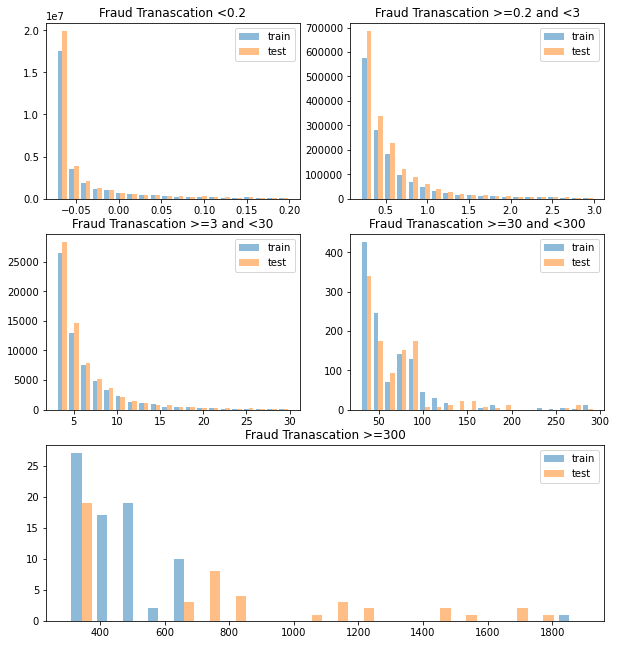

In [26]:
plt.figure(1,figsize=(10,11))
plt.subplot(3,2,1)
mygraph.plot_comp_hist(rcc_train.saldo,rcc_test.saldo,[-np.inf,0.2],labels=['train', 'test'],title="Fraud Tranascation <0.2")
plt.subplot(3,2,2)
mygraph.plot_comp_hist(rcc_train.saldo,rcc_test.saldo,[0.2,3],labels=['train', 'test'],title="Fraud Tranascation >=0.2 and <3")
plt.subplot(3,2,3)
mygraph.plot_comp_hist(rcc_train.saldo,rcc_test.saldo,[3,30],labels=['train', 'test'],title="Fraud Tranascation >=3 and <30")
plt.subplot(3,2,4)
mygraph.plot_comp_hist(rcc_train.saldo,rcc_test.saldo,[30,300],labels=['train', 'test'],title="Fraud Tranascation >=30 and <300")
plt.subplot(3,2,(5,6))
mygraph.plot_comp_hist(rcc_train.saldo,rcc_test.saldo,[300,np.inf],labels=['train', 'test'],title="Fraud Tranascation >=300")
plt.showtitle=()

In [27]:
rcc_test["log_saldo"] = np.log((rcc_test.saldo>0)*rcc_test.saldo + (rcc_test.saldo<=0)*np.abs(rcc_test.saldo-0.0001))

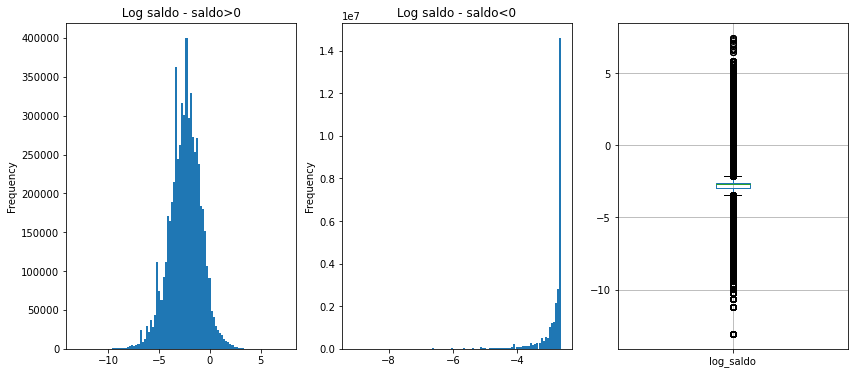

In [28]:
plt.figure(1,figsize=(14,6))
plt.subplot(1,3,1)
rcc_test.log_saldo[rcc_test.saldo>0].plot.hist(title=" Log saldo - saldo>0 ",bins=100)
plt.subplot(1,3,2)
rcc_test.log_saldo[rcc_test.saldo<=0].plot.hist(title="Log saldo - saldo<0",bins=100)
plt.subplot(1,3,3)
boxplot = rcc_test.boxplot(column=['log_saldo'])
plt.show()

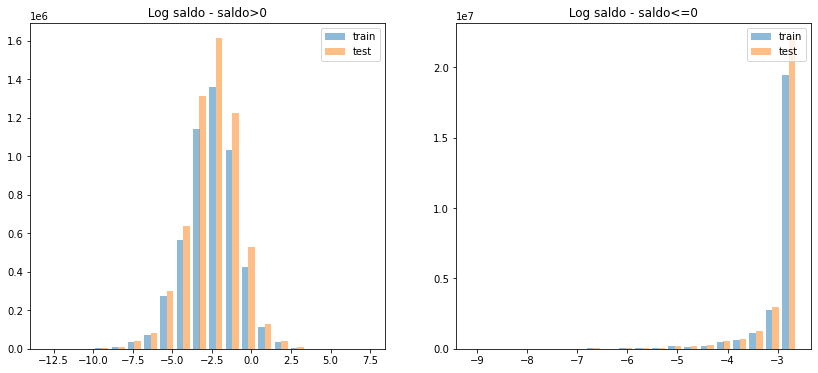

In [29]:
plt.figure(1,figsize=(14,6))
plt.subplot(1,2,1)
mygraph.plot_comp_hist(rcc_train.log_saldo[rcc_train.saldo>0],rcc_test.log_saldo[rcc_test.saldo>0],labels=['train', 'test'],title=" Log saldo - saldo>0 ")
plt.subplot(1,2,2)
mygraph.plot_comp_hist(rcc_train.log_saldo[rcc_train.saldo<=0],rcc_test.log_saldo[rcc_test.saldo<=0],labels=['train', 'test'],title=" Log saldo - saldo<=0 ")
plt.show()

In [30]:
rcc_train.head(1)

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,log_saldo
0,201711,4,0,12,33,-0.072571,6,-1,0,-2.621094


In [31]:
rcc_train_ag = rcc_train.merge(y_train,on=['key_value'],how='left')
print(rcc_train_ag.target.isna(). sum())

0


In [32]:
rcc_train_ag.head(1)

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,log_saldo,target
0,201711,4,0,12,33,-0.072571,6,-1,0,-2.621094,1


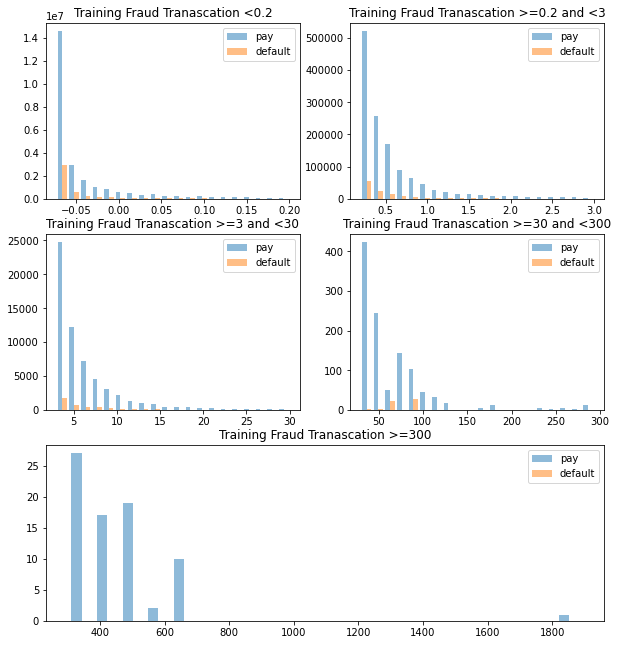

In [33]:
plt.figure(1,figsize=(10,11))
plt.subplot(3,2,1)
mygraph.plot_comp_hist(rcc_train.saldo[rcc_train_ag.target==0],rcc_train.saldo[rcc_train_ag.target==1],[-np.inf,0.2],labels=['pay', 'default'],title="Training Fraud Tranascation <0.2")
plt.subplot(3,2,2)
mygraph.plot_comp_hist(rcc_train.saldo[rcc_train_ag.target==0],rcc_train.saldo[rcc_train_ag.target==1],[0.2,3],labels=['pay', 'default'],title="Training Fraud Tranascation >=0.2 and <3")
plt.subplot(3,2,3)
mygraph.plot_comp_hist(rcc_train.saldo[rcc_train_ag.target==0],rcc_train.saldo[rcc_train_ag.target==1],[3,30],labels=['pay', 'default'],title="Training Fraud Tranascation >=3 and <30")
plt.subplot(3,2,4)
mygraph.plot_comp_hist(rcc_train.saldo[rcc_train_ag.target==0],rcc_train.saldo[rcc_train_ag.target==1],[30,300],labels=['pay', 'default'],title="Training Fraud Tranascation >=30 and <300")
plt.subplot(3,2,(5,6))
mygraph.plot_comp_hist(rcc_train.saldo[rcc_train_ag.target==0],rcc_train.saldo[rcc_train_ag.target==1],[300,np.inf],labels=['pay', 'default'],title="Training Fraud Tranascation >=300")
plt.showtitle=()

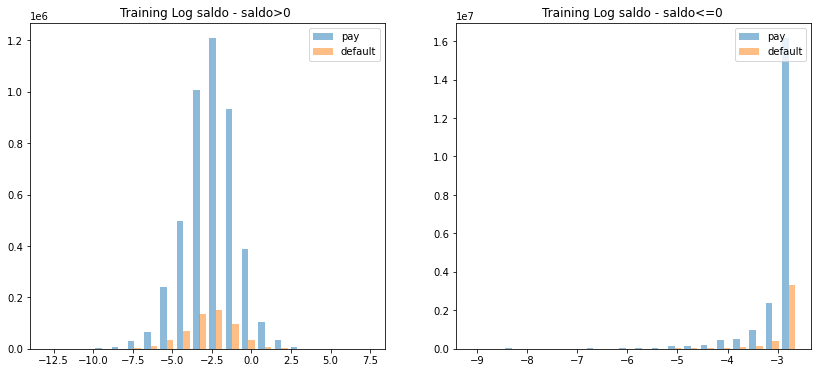

In [34]:
plt.figure(1,figsize=(14,6))
plt.subplot(1,2,1)
mygraph.plot_comp_hist(rcc_train.log_saldo[(rcc_train.saldo>0)&(rcc_train_ag.target == 0)],rcc_train.log_saldo[(rcc_train.saldo>0)&(rcc_train_ag.target == 1)],labels=['pay', 'default'],title="Training Log saldo - saldo>0 ")
plt.subplot(1,2,2)
mygraph.plot_comp_hist(rcc_train.log_saldo[(rcc_train.saldo<=0)&(rcc_train_ag.target == 0)],rcc_train.log_saldo[(rcc_train.saldo<=0)&(rcc_train_ag.target == 1)],labels=['pay', 'default'],title="Training Log saldo - saldo<=0 ")
plt.show()

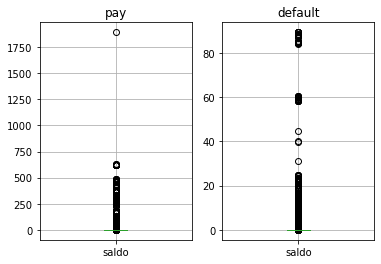

In [35]:
plt.figure(1)
plt.subplot(1,2,1)
boxplot = rcc_train[(rcc_train_ag.target == 0)].boxplot(column=['saldo'])
plt.title('pay')
plt.subplot(1,2,2)
boxplot = rcc_train[(rcc_train_ag.target == 1)].boxplot(column=['saldo'])
plt.title('default')
plt.show()

In [36]:
rcc_pay    = list(rcc_train.key_value[(rcc_train_ag.target == 0)&(rcc_train_ag.saldo>30)].unique())
rcc_default= list(rcc_train.key_value[(rcc_train_ag.target == 1)&(rcc_train_ag.saldo>30)].unique())
print(len(rcc_pay),len(rcc_default))

107 9


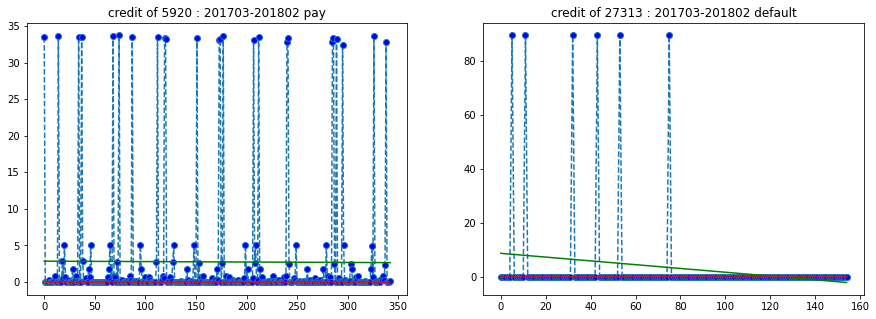

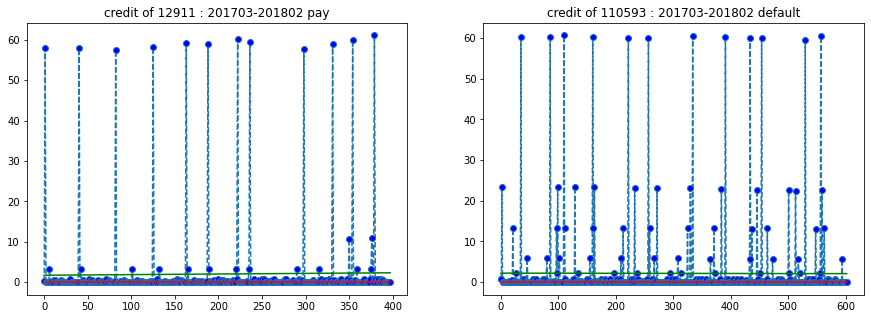

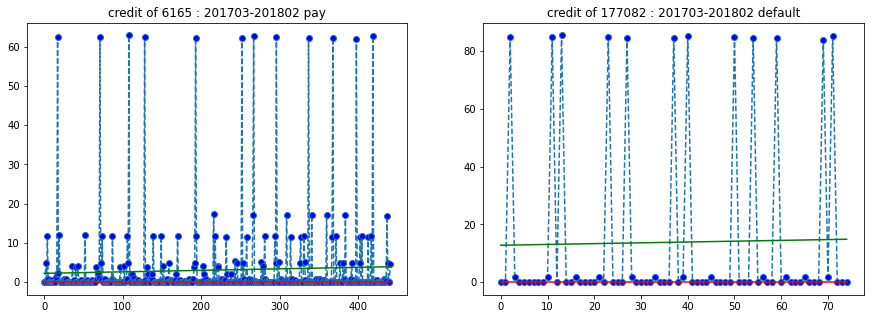

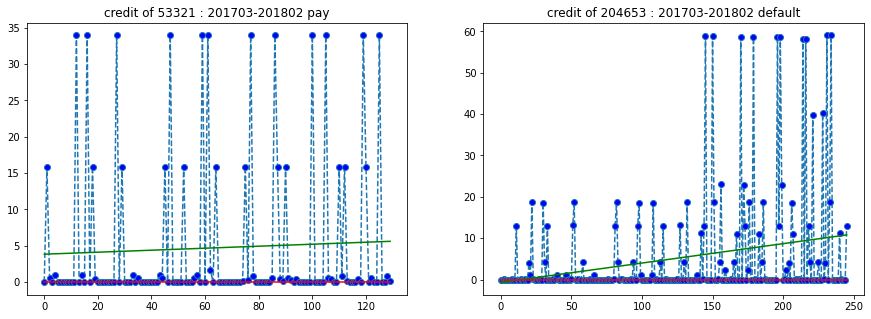

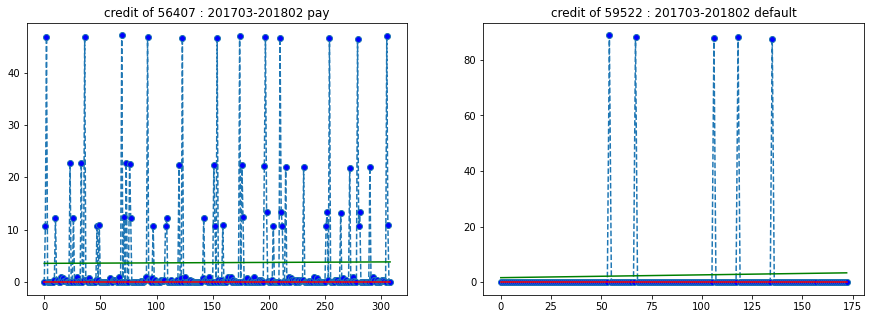

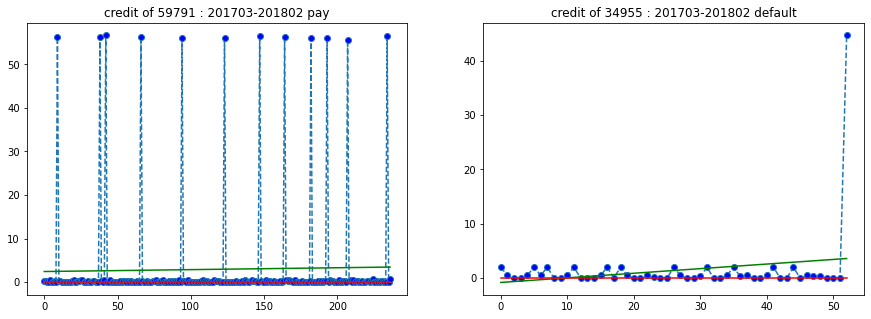

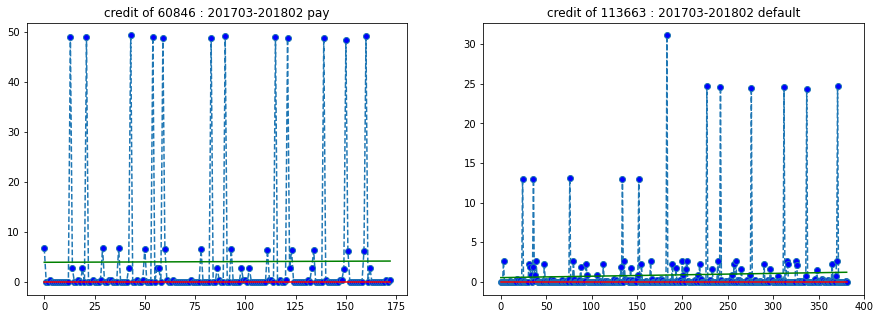

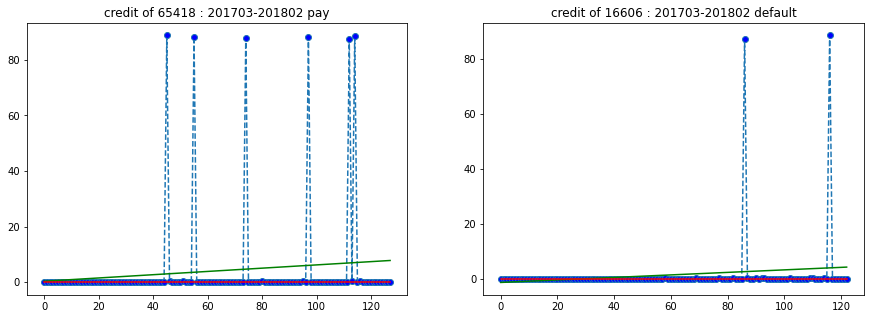

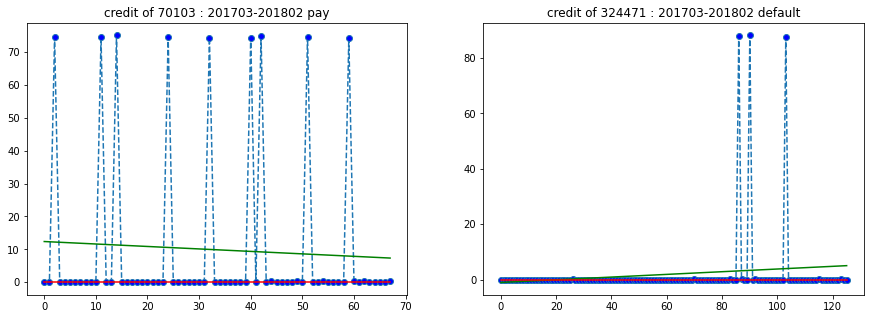

In [37]:
def plot_history(data,column,id_,type_='pay'):
    aux = data[data.key_value == id_].sort_values(by=['codmes'])
    aux['index']= list(range(aux.shape[0]))
    plt.plot(aux["index"],aux[column], linestyle='dashed', marker='o',
         markerfacecolor='blue')

    linear_model=np.polyfit(aux["index"],np.array(aux[column],dtype=float),1)
    linear_model_fn=np.poly1d(linear_model)
    x_s=np.arange(0,len(aux["index"]))
    plt.plot(x_s,linear_model_fn(x_s),color="green")
    plt.plot(x_s,x_s*0,color="red")

    plt.title('credit of '+str(id_)+' : '+str(aux["codmes"].min())+'-'+str(aux["codmes"].max())+' '+type_)

for idx in range(9):
    id_pay     = rcc_pay[idx]
    id_default = rcc_default[idx]
    plt.figure(1,figsize=(15,5))
    plt.subplot(1,2,1)
    plot_history(rcc_train,"saldo",id_pay,type_='pay')
    plt.subplot(1,2,2)
    plot_history(rcc_train,"saldo",id_default,type_='default')
    plt.show()


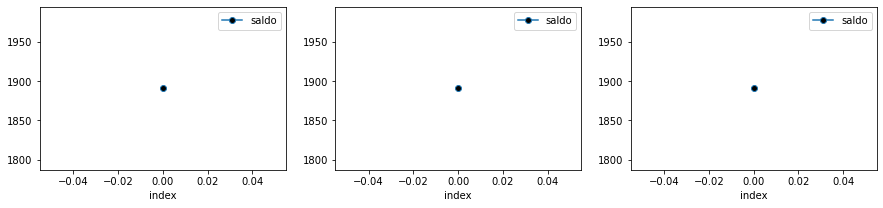

In [38]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=3)
aux.plot(x="index",y=["saldo"],style='.-',marker='o', markerfacecolor='black',figsize=(15,3),ax=axes[0])
aux.plot(x="index",y=["saldo"],style='.-',marker='o', markerfacecolor='black',figsize=(15,3),ax=axes[1])
aux.plot(x="index",y=["saldo"],style='.-',marker='o', markerfacecolor='black',figsize=(15,3),ax=axes[2])
plt.show()

In [39]:
rcc_train.head()

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,log_saldo
0,201711,4,0,12,33,-0.072571,6,-1,0,-2.621094
1,201711,4,0,12,33,-0.070618,7,-1,0,-2.648438
2,201711,4,0,12,61,-0.052063,5,-1,0,-2.953125
3,201711,4,0,11,32,-0.072449,8,1,0,-2.623047
4,201711,4,0,12,61,-0.057892,0,1,0,-2.847656


#### Create new features in rcc_train

In [40]:
#Find maximun default saldo #saldo                           89.500000
rcc_train[(rcc_train_ag.target == 1)].max()

codmes                      201802.000000
key_value                   358372.000000
condicion                     9999.000000
tipo_credito                    99.000000
cod_instit_financiera          108.000000
saldo                           89.500000
PRODUCTO                       255.000000
RIESGO_DIRECTO                   5.000000
COD_CLASIFICACION_DEUDOR         5.000000
log_saldo                        4.496094
dtype: float64

In [41]:
rcc_test.max()

codmes                      201902.00000
key_value                   396665.00000
condicion                     9999.00000
tipo_credito                    99.00000
cod_instit_financiera          108.00000
saldo                         1749.00000
PRODUCTO                        41.00000
RIESGO_DIRECTO                   5.00000
COD_CLASIFICACION_DEUDOR         5.00000
log_saldo                        7.46875
dtype: float64

In [42]:
rcc_test.sort_values(by=['codmes'])

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,log_saldo
11042264,201803,45180,0,12,22.0,0.026764,10.0,-1,0,-3.621094
25941812,201803,162969,0,12,11.0,-0.042450,0.0,1,0,-3.158203
25941813,201803,162969,0,11,11.0,-0.071716,1.0,-1,0,-2.632812
25941814,201803,162969,0,11,8.0,-0.072449,1.0,-1,0,-2.623047
25941815,201803,162969,0,11,1.0,-0.068665,1.0,-1,0,-2.675781
...,...,...,...,...,...,...,...,...,...,...
28171641,201902,259209,0,10,55.0,-0.072693,1.0,-1,0,-2.619141
28171640,201902,259208,0,9,28.0,-0.072876,5.0,-1,0,-2.617188
28171639,201902,259208,0,9,28.0,-0.071289,1.0,-1,0,-2.638672
28171637,201902,259208,0,12,57.0,-0.071289,NaN,-1,0,-2.638672


In [43]:
rcc_train.describe()

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,log_saldo
count,3.039163e+07,3.039163e+07,3.039163e+07,3.039163e+07,3.039163e+07,3.039163e+07,3.039163e+07,3.039163e+07,3.039163e+07,3.039163e+07
mean,2.017257e+05,1.730234e+05,1.438200e+01,1.159850e+01,2.143093e+01,-0.000000e+00,1.923337e+01,-4.401513e-01,1.112843e-01,NaN
std,3.713038e+01,1.014365e+05,1.863511e+02,7.581905e+00,1.769596e+01,NaN,5.951342e+01,9.063443e-01,5.831958e-01,0.000000e+00
min,2.017030e+05,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,-7.287598e-02,0.000000e+00,-1.000000e+00,0.000000e+00,-1.307812e+01
25%,2.017060e+05,8.483800e+04,0.000000e+00,1.100000e+01,3.000000e+00,-7.232666e-02,1.000000e+00,-1.000000e+00,0.000000e+00,-2.957031e+00
50%,2.017090e+05,1.723880e+05,0.000000e+00,1.100000e+01,1.800000e+01,-6.396484e-02,3.000000e+00,-1.000000e+00,0.000000e+00,-2.675781e+00
75%,2.017120e+05,2.592100e+05,0.000000e+00,1.100000e+01,3.400000e+01,-3.308105e-02,8.000000e+00,1.000000e+00,0.000000e+00,-2.619141e+00
max,2.018020e+05,3.584860e+05,9.999000e+03,9.900000e+01,1.080000e+02,1.891000e+03,2.550000e+02,5.000000e+00,5.000000e+00,7.542969e+00


# condicion

In [44]:
rcc_train['condicion'].nunique()

7245

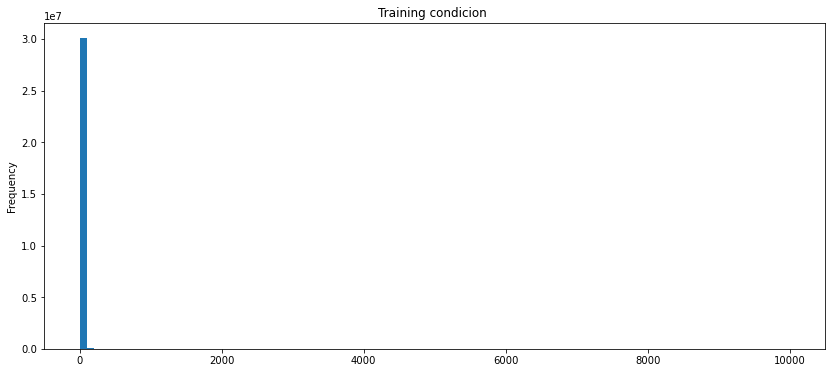

In [45]:
#mygraph.graph_target(rcc_train,name="condicion",figsize=(6,4),title_name="condicion",color_text="white",save=False,name_file='condicion_distribution')
plt.figure(1,figsize=(14,6))
rcc_train.condicion.plot.hist(title="Training condicion ",bins=100)
plt.show()

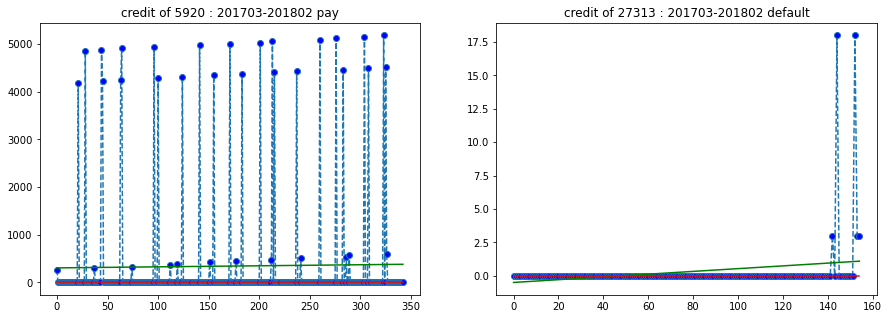

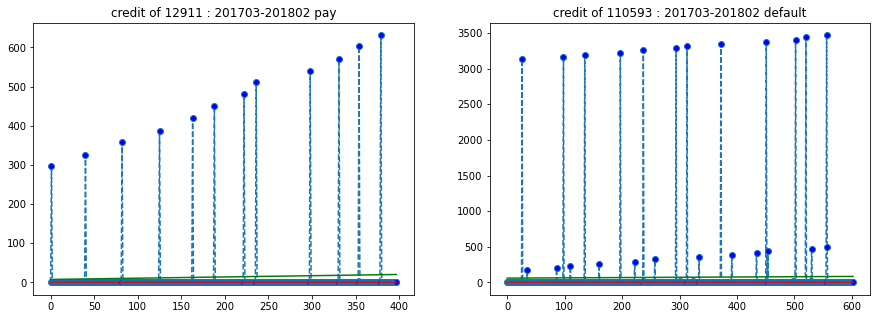

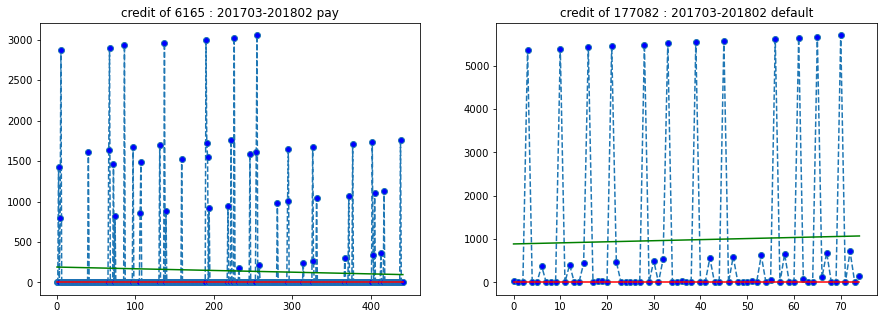

In [46]:
for idx in range(3):
    id_pay     = rcc_pay[idx]
    id_default = rcc_default[idx]
    plt.figure(1,figsize=(15,5))
    plt.subplot(1,2,1)
    plot_history(rcc_train,"condicion",id_pay,type_='pay')
    plt.subplot(1,2,2)
    plot_history(rcc_train,"condicion",id_default,type_='default')
    plt.show()


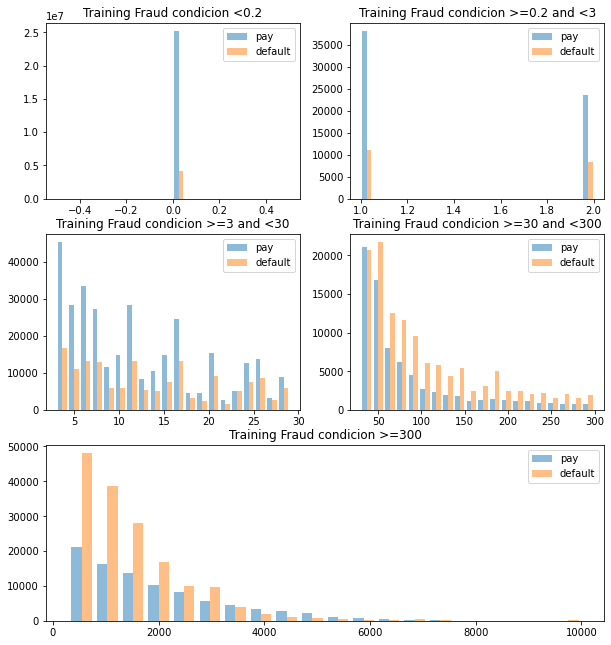

In [47]:
def graph_comparate_hist_rcc(data1,target1,name):
    id_target = target1==0
    id_ntarget = target1==1
    plt.figure(1,figsize=(10,11))
    plt.subplot(3,2,1)
    mygraph.plot_comp_hist(data1[id_target],data1[id_ntarget],[-np.inf,0.2],labels=['pay', 'default'],title="Training Fraud "+name+" <0.2")
    plt.subplot(3,2,2)
    mygraph.plot_comp_hist(data1[id_target],data1[id_ntarget],[0.2,3],labels=['pay', 'default'],title="Training Fraud "+name+" >=0.2 and <3")
    plt.subplot(3,2,3)
    mygraph.plot_comp_hist(data1[id_target],data1[id_ntarget],[3,30],labels=['pay', 'default'],title="Training Fraud "+name+" >=3 and <30")
    plt.subplot(3,2,4)
    mygraph.plot_comp_hist(data1[id_target],data1[id_ntarget],[30,300],labels=['pay', 'default'],title="Training Fraud "+name+" >=30 and <300")
    plt.subplot(3,2,(5,6))
    mygraph.plot_comp_hist(data1[id_target],data1[id_ntarget],[300,np.inf],labels=['pay', 'default'],title="Training Fraud "+name+" >=300")
    plt.show()

#rcc_train.saldo
graph_comparate_hist_rcc(rcc_train.condicion,rcc_train_ag.target,'condicion')

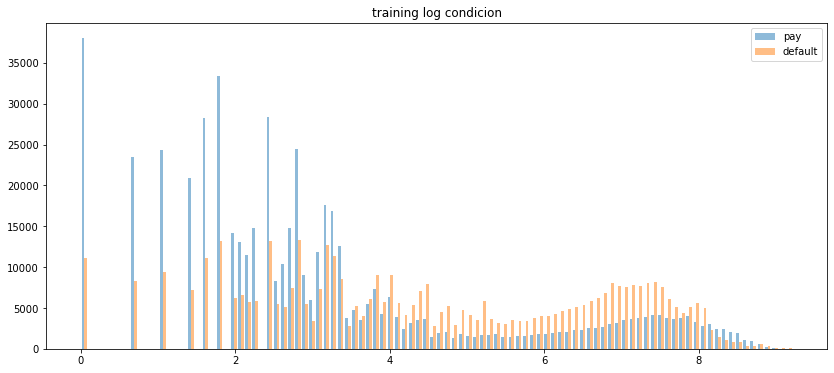

In [48]:
rcc_train['log_condicion'] = np.log(rcc_train.condicion+0.001)
plt.figure(1,figsize=(14,6))
#rcc_train['log_condicion'][rcc_train.condicion>0].plot.hist(title="Training condicion ",bins=100)
x = rcc_train['log_condicion'][(rcc_train.condicion>0)&(rcc_train_ag.target==0)]
y = rcc_train['log_condicion'][(rcc_train.condicion>0)&(rcc_train_ag.target==1)]
plt.hist([x, y],label=['pay','default'], bins = 100, alpha=0.5)
plt.legend(loc='upper right')
plt.title('training log condicion')
plt.show()

In [49]:
rcc_train['condicion'].unique()

array([   0,    6,    1, ..., 7718, 7343, 8126], dtype=int16)

In [50]:
rcc_train.condicion.value_counts()/len(rcc_train.condicion)*100
# Las 9 primeras suman el 95%

0       96.685900
1        0.161637
6        0.153345
5        0.129559
3        0.110929
          ...    
6875     0.000003
6343     0.000003
4650     0.000003
6340     0.000003
6664     0.000003
Name: condicion, Length: 7245, dtype: float64

In [51]:
rcc_train.head(1)

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,log_saldo,log_condicion
0,201711,4,0,12,33,-0.072571,6,-1,0,-2.621094,-6.907755


# tipo_credito

In [52]:
rcc_train.tipo_credito.value_counts()/len(rcc_train)*100

11    58.343969
12    18.593602
10    17.417936
9      3.893477
13     0.881743
99     0.739674
8      0.127482
6      0.002116
Name: tipo_credito, dtype: float64

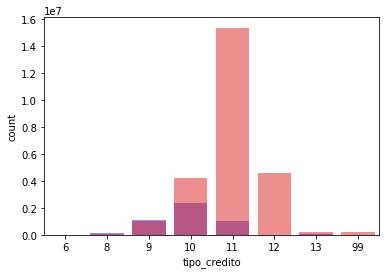

In [53]:
#graph_comparate_hist_rcc(rcc_train.tipo_credito,rcc_train_ag.target,'tipo_credito') mal porq es discreto
#plot a bar graph and assign variable to hue
#sns.barplot(x='tipo_credito',y='value',hue='variable',data=rcc_train,palette=['blue','red'],alpha=.5,dodge=False)
plt.figure(1)
sns.countplot(x='tipo_credito',data=rcc_train[rcc_train_ag.target ==1],palette=['blue'],alpha=.5,dodge=False)
sns.countplot(x='tipo_credito',data=rcc_train[rcc_train_ag.target ==0],palette=['red'],alpha=.5,dodge=False)
plt.show()


In [54]:
#sns.scatterplot(data=rcc_train_ag, x="tipo_credito", y="condicion", hue="target")
#sns.catplot(x="tipo_credito", y="condicion", hue="target", kind="swarm", data=rcc_train_ag)
#sns.catplot(x="tipo_credito", y="condicion", kind="swarm", data=rcc_train[rcc_train_ag.target ==1])
#sns.plot(x='tipo_credito',y='condicion',data=rcc_train[rcc_train_ag.target ==1],palette=['blue'],alpha=.5,dodge=False)

# cod_instit_financiera

In [55]:
rcc_train.cod_instit_financiera.value_counts()/len(rcc_train)*100

34     10.756848
1       9.604415
10      8.405088
28      8.260453
11      7.478965
         ...    
105     0.000039
31      0.000033
98      0.000030
72      0.000026
87      0.000016
Name: cod_instit_financiera, Length: 109, dtype: float64

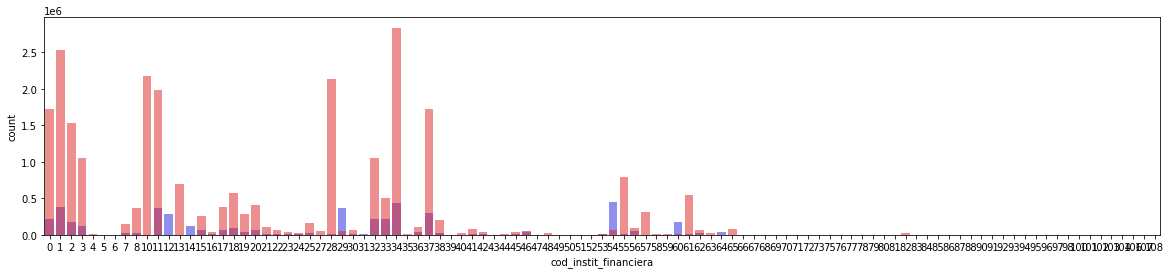

In [56]:
plt.figure(1,figsize=(20,4))
sns.countplot(x='cod_instit_financiera',data=rcc_train[rcc_train_ag.target ==1],palette=['blue'],alpha=.5,dodge=False)
sns.countplot(x='cod_instit_financiera',data=rcc_train[rcc_train_ag.target ==0],palette=['red'],alpha=.5,dodge=False)
plt.show()

In [57]:
a = (rcc_train.cod_instit_financiera.value_counts()/len(rcc_train)*100)
data = pd.DataFrame(rcc_train.cod_instit_financiera.value_counts())
index = list(data.index)
print(index)

[34, 1, 10, 28, 11, 37, 0, 2, 32, 55, 3, 13, 61, 33, 18, 20, 17, 8, 57, 19, 15, 38, 25, 7, 36, 21, 65, 56, 41, 46, 54, 22, 30, 62, 29, 27, 45, 16, 63, 23, 42, 40, 24, 82, 48, 35, 4, 59, 44, 53, 60, 58, 43, 95, 69, 49, 92, 12, 96, 64, 102, 85, 39, 83, 52, 108, 101, 104, 51, 107, 106, 100, 90, 77, 94, 103, 80, 86, 91, 78, 68, 97, 50, 47, 88, 99, 79, 73, 75, 26, 81, 6, 5, 71, 14, 66, 84, 93, 89, 76, 70, 67, 9, 74, 105, 31, 98, 72, 87]


# PRODUCTO

In [58]:
a = rcc_train.PRODUCTO.value_counts()/len(rcc_train)*100
a[:10]

1      20.685566
2      15.648672
3      14.922041
8      10.101361
255     5.965712
4       5.760126
0       5.533630
6       4.817218
5       4.082579
11      3.070533
Name: PRODUCTO, dtype: float64

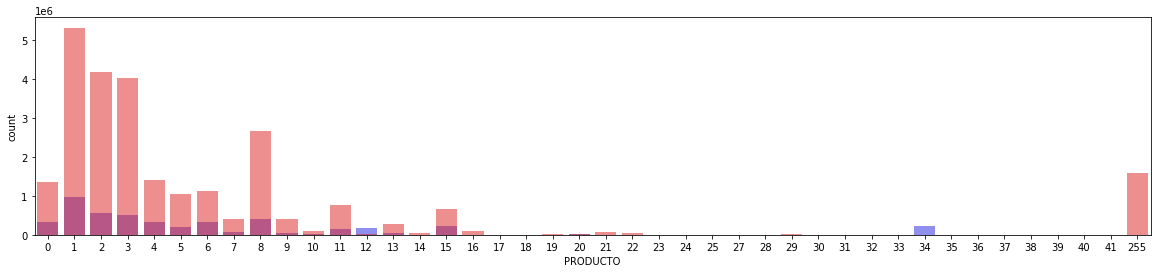

In [59]:
plt.figure(1,figsize=(20,4))
sns.countplot(x='PRODUCTO',data=rcc_train[rcc_train_ag.target ==1],palette=['blue'],alpha=.5,dodge=False)
sns.countplot(x='PRODUCTO',data=rcc_train[rcc_train_ag.target ==0],palette=['red'],alpha=.5,dodge=False)
plt.show()

In [60]:
rcc_train['PRODUCTO'] = rcc_train.PRODUCTO.isin([1,2,3,8,255,4,0,6,5,11]) 
rcc_train['cod_instit_financiera_id']= rcc_train.cod_instit_financiera.isin([34, 1, 10, 28, 11, 37, 0, 2, 32, 55, 3, 13, 61, 33, 18, 20, 17, 8, 57, 19, 15, 38, 25, 7, 36, 21, 65, 56, 41, 46, 54, 22, 30, 62, 29, 27, 45, 16, 63, 23, 42, 40, 24, 82, 48, 35, 4, 59, 44, 53, 60, 58, 43, 95, 69, 49, 92, 12, 96, 64, 102, 85, 39, 83, 52, 108, 101, 104, 51, 107, 106, 100, 90, 77, 94, 103, 80, 86, 91, 78, 68, 97, 50, 47, 88, 99, 79, 73, 75, 26, 81, 6, 5, 71, 14, 66, 84, 93, 89, 76, 70, 67, 9, 74, 105, 31, 98, 72, 87])

In [61]:
rcc_train.head(1)

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,log_saldo,log_condicion,cod_instit_financiera_id
0,201711,4,0,12,33,-0.072571,True,-1,0,-2.621094,-6.907755,True


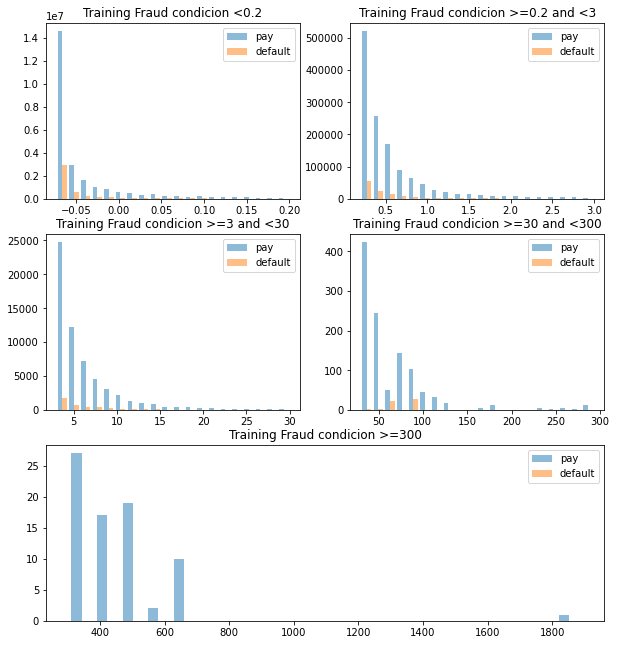

In [63]:
#rcc_train.saldo
graph_comparate_hist_rcc(rcc_train.saldo[rcc_train.PRODUCTO<50],rcc_train_ag.target,'condicion')

# RIESGO_DIRECTO

In [61]:
a = rcc_train.RIESGO_DIRECTO.value_counts()/len(rcc_train)*100
a

-1    72.226705
 1    27.408168
 2     0.311359
 3     0.044075
 5     0.009693
Name: RIESGO_DIRECTO, dtype: float64

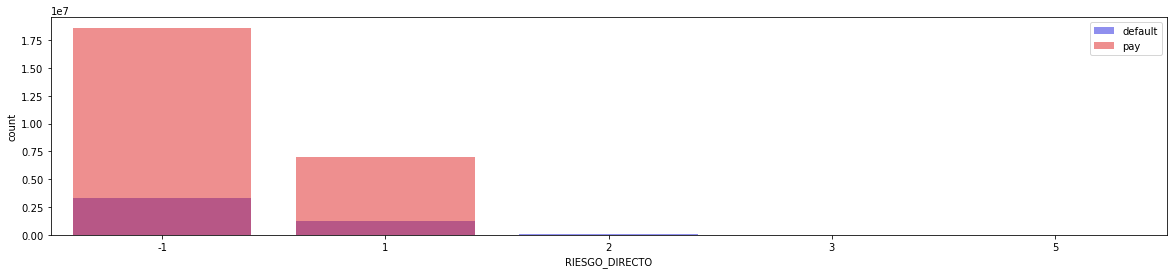

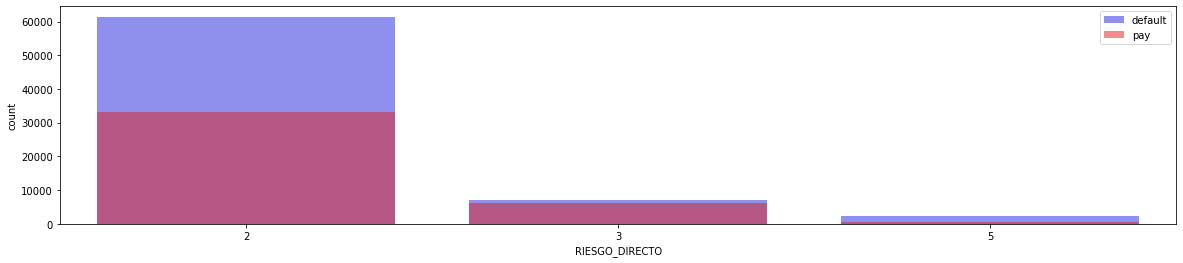

In [62]:
plt.figure(1,figsize=(20,4))
sns.countplot(x='RIESGO_DIRECTO',data=rcc_train[rcc_train_ag.target ==1],palette=['blue'],alpha=.5,dodge=False,label="default")
sns.countplot(x='RIESGO_DIRECTO',data=rcc_train[rcc_train_ag.target ==0],palette=['red'],alpha=.5,dodge=False,label="pay")
plt.legend(loc='upper right')
plt.show()
plt.figure(1,figsize=(20,4))
sns.countplot(x='RIESGO_DIRECTO',data=rcc_train[(rcc_train_ag.target ==1)&(rcc_train_ag.RIESGO_DIRECTO>1)],palette=['blue'],alpha=.5,dodge=False,label="default")
sns.countplot(x='RIESGO_DIRECTO',data=rcc_train[(rcc_train_ag.target ==0)&(rcc_train_ag.RIESGO_DIRECTO>1)],palette=['red'],alpha=.5,dodge=False,label="pay")
plt.legend(loc='upper right')
plt.show()

In [63]:
rcc_train['RIESGO_DIRECTO_id'] = rcc_train.RIESGO_DIRECTO.isin([2,3,5]) 


# COD_CLASIFICACION_DEUDOR

In [64]:
a = rcc_train.COD_CLASIFICACION_DEUDOR.value_counts()/len(rcc_train)*100
a

0    95.216748
1     1.992131
3     1.066541
2     0.786776
5     0.611909
4     0.325896
Name: COD_CLASIFICACION_DEUDOR, dtype: float64

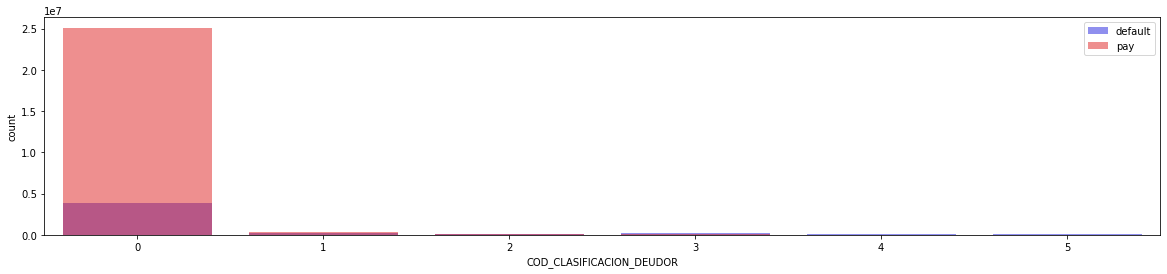

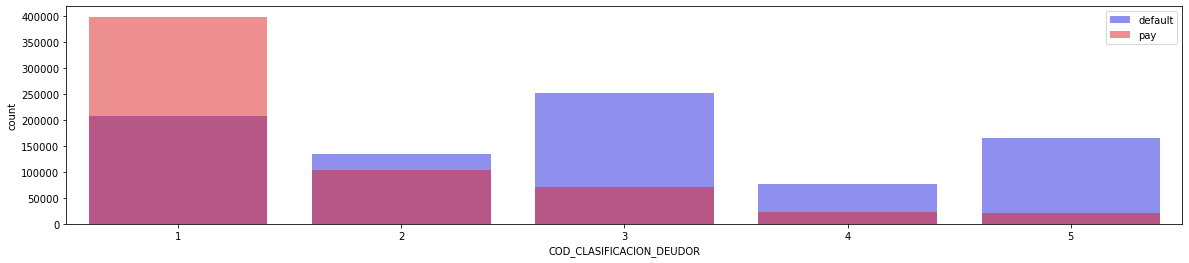

In [65]:
plt.figure(1,figsize=(20,4))
sns.countplot(x='COD_CLASIFICACION_DEUDOR',data=rcc_train[rcc_train_ag.target ==1],palette=['blue'],alpha=.5,dodge=False,label="default")
sns.countplot(x='COD_CLASIFICACION_DEUDOR',data=rcc_train[rcc_train_ag.target ==0],palette=['red'],alpha=.5,dodge=False,label="pay")
plt.legend(loc='upper right')
plt.show()
#'''
plt.figure(1,figsize=(20,4))
sns.countplot(x='COD_CLASIFICACION_DEUDOR',data=rcc_train[(rcc_train_ag.target ==1)&(rcc_train_ag.COD_CLASIFICACION_DEUDOR>0)],palette=['blue'],alpha=.5,dodge=False,label="default")
sns.countplot(x='COD_CLASIFICACION_DEUDOR',data=rcc_train[(rcc_train_ag.target ==0)&(rcc_train_ag.COD_CLASIFICACION_DEUDOR>0)],palette=['red'],alpha=.5,dodge=False,label="pay")
plt.legend(loc='upper right')
plt.show()
#'''

In [66]:
rcc_train['COD_CLASIFICACION_DEUDOR_id'] = rcc_train.COD_CLASIFICACION_DEUDOR.isin([2,3,4,5]) 

In [67]:
# combination COD_CLASIFICACION_DEUDOR and RIESGO_DIRECTO

In [68]:
rcc_train['auxiliar_RIESGO_CLASS'] = rcc_train.COD_CLASIFICACION_DEUDOR.astype(str)+'/'+rcc_train.RIESGO_DIRECTO.astype(str)

In [69]:
a = rcc_train.auxiliar_RIESGO_CLASS.value_counts()/len(rcc_train)*100
print(len(a))
a

25


0/-1    68.709601
0/1     26.492837
1/-1     1.486844
3/-1     0.690585
5/-1     0.611909
2/-1     0.498335
1/1      0.492359
3/1      0.255534
4/-1     0.229432
2/1      0.160186
2/2      0.118075
3/2      0.108523
4/2      0.076429
3/3      0.011503
1/3      0.011131
2/3      0.010174
4/5      0.009276
0/3      0.007759
4/1      0.007252
0/2      0.006535
4/3      0.003508
1/2      0.001797
3/5      0.000395
0/5      0.000016
2/5      0.000007
Name: auxiliar_RIESGO_CLASS, dtype: float64

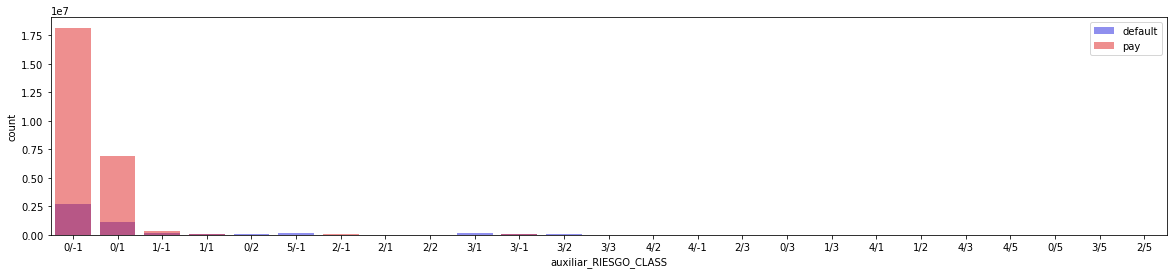

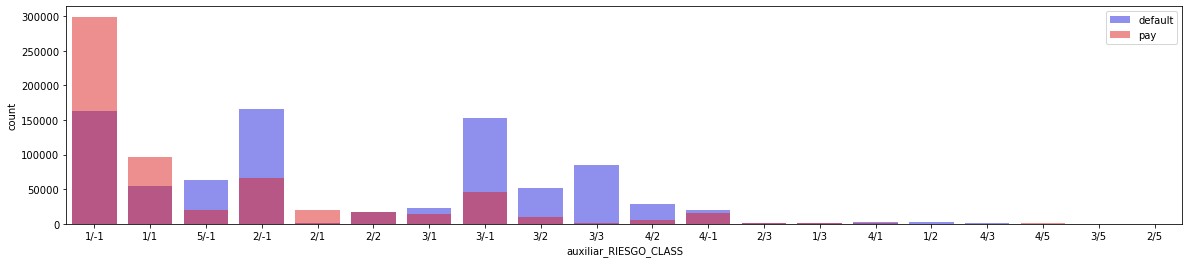

In [70]:
plt.figure(1,figsize=(20,4))
sns.countplot(x='auxiliar_RIESGO_CLASS',data=rcc_train[rcc_train_ag.target ==1],palette=['blue'],alpha=.5,dodge=False,label="default")
sns.countplot(x='auxiliar_RIESGO_CLASS',data=rcc_train[rcc_train_ag.target ==0],palette=['red'],alpha=.5,dodge=False,label="pay")
plt.legend(loc='upper right')
plt.show()
#'''
plt.figure(1,figsize=(20,4))
sns.countplot(x='auxiliar_RIESGO_CLASS',data=rcc_train[(rcc_train_ag.target ==1)&(rcc_train_ag.COD_CLASIFICACION_DEUDOR!=0)],palette=['blue'],alpha=.5,dodge=False,label="default")
sns.countplot(x='auxiliar_RIESGO_CLASS',data=rcc_train[(rcc_train_ag.target ==0)&(rcc_train_ag.COD_CLASIFICACION_DEUDOR!=0)],palette=['red'],alpha=.5,dodge=False,label="pay")
plt.legend(loc='upper right')
plt.show()
#'''

In [2]:
rcc_train = pd.read_csv("../resources/data/rcc_train.csv")
rcc_train = analyze.reduce_mem_usage(rcc_train)
rcc_train.head(3)

rcc_test = pd.read_csv("../resources/data/rcc_test.csv")
rcc_test = analyze.reduce_mem_usage(rcc_test)
rcc_test.head(3)

Memory usage of dataframe is 2086.83 MB
Memory usage after optimization is: 521.71 MB
Decreased by 75.0%
Memory usage of dataframe is 2358.75 MB
Memory usage after optimization is: 622.45 MB
Decreased by 73.6%


,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR
0,201811,1103,0,10,28.0,-0.072815,1.0,-1,0
1,201811,1103,0,10,28.0,-0.072876,5.0,-1,0
2,201811,1103,0,10,28.0,-0.065857,4.0,1,0


In [3]:
for df in [rcc_train,rcc_test]:
    df['in_range_default'] = df.saldo<90
    df['codmes']= pd.to_numeric(df['codmes']).astype(np.int64)
    df['codmes']= df['codmes'].apply(str)
    df['codmes']= pd.to_datetime(df['codmes'],format='%Y%m')#%d infer_datetime_format=True)
    df['condicion_id']=df['condicion']==0
    df['cod_instit_financiera_id']= df.cod_instit_financiera.isin([34, 1, 10, 28, 11, 37, 0, 2, 32, 55, 3, 13, 61, 33, 18, 20, 17, 8, 57, 19, 15, 38, 25, 7, 36, 21, 65, 56, 41, 46, 54, 22, 30, 62, 29, 27, 45, 16, 63, 23, 42, 40, 24, 82, 48, 35, 4, 59, 44, 53, 60, 58, 43, 95, 69, 49, 92, 12, 96, 64, 102, 85, 39, 83, 52, 108, 101, 104, 51, 107, 106, 100, 90, 77, 94, 103, 80, 86, 91, 78, 68, 97, 50, 47, 88, 99, 79, 73, 75, 26, 81, 6, 5, 71, 14, 66, 84, 93, 89, 76, 70, 67, 9, 74, 105, 31, 98, 72, 87])
    df['PRODUCTO_id'] = df.PRODUCTO.isin([1,2,3,8,255,4,0,6,5,11]) 
    df['PRODUCTO_id_notexist'] = df.PRODUCTO.isin([255]) 
    df['RIESGO_DIRECTO_id'] = df.RIESGO_DIRECTO.isin([2,3,5]) 
    df['COD_CLASIFICACION_DEUDOR'] = df.COD_CLASIFICACION_DEUDOR.isin([2,3,4,5]) 
    df['log_saldo'] = np.log((df.saldo>0)*df.saldo + (df.saldo<=0)*np.abs(df.saldo-0.0001))
    df['neg_saldo'] = df.saldo<0
bins = [-np.inf,0.2,3,30,300,np.inf]
[rcc_train,rcc_test] = analyze.feature_range([rcc_train,rcc_test],'saldo',bins,onehot=False)

In [4]:
rcc_train.head()

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,in_range_default,condicion_id,cod_instit_financiera_id,PRODUCTO_id,PRODUCTO_id_notexist,RIESGO_DIRECTO_id,log_saldo,neg_saldo,saldo_1
0,2017-11-01,4,0,12,33,-0.072571,6,-1,False,True,True,True,True,False,False,-2.621094,True,1.0
1,2017-11-01,4,0,12,33,-0.070618,7,-1,False,True,True,True,False,False,False,-2.648438,True,1.0
2,2017-11-01,4,0,12,61,-0.052063,5,-1,False,True,True,True,True,False,False,-2.953125,True,1.0
3,2017-11-01,4,0,11,32,-0.072449,8,1,False,True,True,True,True,False,False,-2.623047,True,1.0
4,2017-11-01,4,0,12,61,-0.057892,0,1,False,True,True,True,True,False,False,-2.847656,True,1.0


In [5]:
rcc_train.isnull().sum()/len(rcc_train)*100

codmes                      0.0
key_value                   0.0
condicion                   0.0
tipo_credito                0.0
cod_instit_financiera       0.0
saldo                       0.0
PRODUCTO                    0.0
RIESGO_DIRECTO              0.0
COD_CLASIFICACION_DEUDOR    0.0
in_range_default            0.0
condicion_id                0.0
cod_instit_financiera_id    0.0
PRODUCTO_id                 0.0
PRODUCTO_id_notexist        0.0
RIESGO_DIRECTO_id           0.0
log_saldo                   0.0
neg_saldo                   0.0
saldo_1                     0.0
dtype: float64

In [6]:
# TODAVIA NO HE QUITADO OUTLIERS

In [13]:
#rcc_train.to_hdf(r'../resources/mydata/rcc_train.h5', key='stage', mode='w')
rcc_train.to_hdf('../resources/mydata/rcc_train.h5', 'results_table', mode='w',format='table')

In [17]:
rcc_test.to_hdf(r'../resources/mydata/rcc_test.h5','results_table', mode='w',format='table')

In [11]:
#rcc_train.to_csv('../resources/mydata/rcc_train.csv',index=False)
#rcc_test.to_csv('../resources/mydata/rcc_test.csv',index=False)

In [18]:
a = pd.read_hdf('../resources/mydata/rcc_test2.h5', 'results_table')


In [19]:
a.head()

,codmes,key_value,condicion,tipo_credito,cod_instit_financiera,saldo,PRODUCTO,RIESGO_DIRECTO,COD_CLASIFICACION_DEUDOR,in_range_default,condicion_id,cod_instit_financiera_id,PRODUCTO_id,PRODUCTO_id_notexist,RIESGO_DIRECTO_id,log_saldo,neg_saldo,saldo_1
0,2018-11-01,1103,0,10,28.0,-0.072815,1.0,-1,False,True,True,True,True,False,False,-2.617188,True,1.0
1,2018-11-01,1103,0,10,28.0,-0.072876,5.0,-1,False,True,True,True,True,False,False,-2.617188,True,1.0
2,2018-11-01,1103,0,10,28.0,-0.065857,4.0,1,False,True,True,True,True,False,False,-2.718750,True,1.0
3,2018-11-01,1103,0,10,28.0,-0.072876,NaN,-1,False,True,True,True,False,False,False,-2.617188,True,1.0
4,2018-11-01,1104,0,13,3.0,0.583496,19.0,1,False,True,True,True,False,False,False,-0.538574,False,2.0
